# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
!pip install citipy

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from time import ctime as convert

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
base_url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
cityname=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat = []
lng=[]
max_temp = []
windspeed=[]

#setup counter
count=1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        cityname.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        #date.append(convert(int(response['dt'])))
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        print(f"Processing Record for city number {count}, {city}.")
        count= count +1
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")


Processing Record for city number 1, leningradskiy.
------------
Processing Record for city number 2, vanimo.
------------
Missing field/result... skipping.
------------
Missing field/result... skipping.
------------
Processing Record for city number 3, erzin.
------------
Processing Record for city number 4, radomir.
------------
Processing Record for city number 5, mar del plata.
------------
Processing Record for city number 6, san miguel.
------------
Processing Record for city number 7, fallon.
------------
Processing Record for city number 8, shahr-e babak.
------------
Processing Record for city number 9, lorengau.
------------
Processing Record for city number 10, port lincoln.
------------
Processing Record for city number 11, grafton.
------------
Processing Record for city number 12, busselton.
------------
Processing Record for city number 13, lebu.
------------
Processing Record for city number 14, provideniya.
------------
Missing field/result... skipping.
------------
Pr

Missing field/result... skipping.
------------
Processing Record for city number 123, orocue.
------------
Processing Record for city number 124, kibala.
------------
Processing Record for city number 125, komsomolskiy.
------------
Missing field/result... skipping.
------------
Processing Record for city number 126, marsa matruh.
------------
Processing Record for city number 127, bilibino.
------------
Missing field/result... skipping.
------------
Processing Record for city number 128, mahebourg.
------------
Processing Record for city number 129, aromashevo.
------------
Processing Record for city number 130, lasa.
------------
Processing Record for city number 131, liverpool.
------------
Missing field/result... skipping.
------------
Missing field/result... skipping.
------------
Processing Record for city number 132, ribeira grande.
------------
Processing Record for city number 133, abu samrah.
------------
Processing Record for city number 134, boa vista.
------------
Processi

Processing Record for city number 242, pavlivka.
------------
Processing Record for city number 243, kawalu.
------------
Processing Record for city number 244, sturgeon bay.
------------
Missing field/result... skipping.
------------
Missing field/result... skipping.
------------
Processing Record for city number 245, smithers.
------------
Processing Record for city number 246, santiago.
------------
Processing Record for city number 247, bethanien.
------------
Processing Record for city number 248, charlestown.
------------
Processing Record for city number 249, constitucion.
------------
Processing Record for city number 250, yar-sale.
------------
Processing Record for city number 251, santa cruz.
------------
Missing field/result... skipping.
------------
Processing Record for city number 252, kasongo-lunda.
------------
Processing Record for city number 253, ladario.
------------
Processing Record for city number 254, torbay.
------------
Processing Record for city number 255, 

Processing Record for city number 366, mackenzie.
------------
Processing Record for city number 367, tucupita.
------------
Processing Record for city number 368, pietarsaari.
------------
Processing Record for city number 369, anchorage.
------------
Processing Record for city number 370, russell.
------------
Processing Record for city number 371, dhidhdhoo.
------------
Processing Record for city number 372, chagoda.
------------
Processing Record for city number 373, campos novos.
------------
Processing Record for city number 374, kilifi.
------------
Processing Record for city number 375, rasmiresti.
------------
Processing Record for city number 376, ejido.
------------
Processing Record for city number 377, nawabganj.
------------
Processing Record for city number 378, arraial do cabo.
------------
Processing Record for city number 379, ishigaki.
------------
Processing Record for city number 380, hualmay.
------------
Missing field/result... skipping.
------------
Processing 

Processing Record for city number 492, antofagasta.
------------
Processing Record for city number 493, la rioja.
------------
Processing Record for city number 494, qeshm.
------------
Processing Record for city number 495, rorvik.
------------
Processing Record for city number 496, rincon.
------------
Missing field/result... skipping.
------------
Missing field/result... skipping.
------------
Processing Record for city number 497, buala.
------------
Processing Record for city number 498, saint-augustin.
------------
Processing Record for city number 499, ngara.
------------
Processing Record for city number 500, avera.
------------
Missing field/result... skipping.
------------
Processing Record for city number 501, luorong.
------------
Processing Record for city number 502, san quintin.
------------
Missing field/result... skipping.
------------
Processing Record for city number 503, anito.
------------
Processing Record for city number 504, henties bay.
------------
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
#Build and display the dataFrame
weather_dict = {
    "City": cityname,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date" : date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":windspeed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [38]:
weather_data

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0    Leningradskiy         100      RU  1586969215        95  69.38  178.42   
1           Vanimo          32      PG  1586969537        79  -2.67  141.30   
2            Erzin          75      TR  1586969537        63  36.96   36.20   
3          Radomir          40      BG  1586969443        56  42.54   22.96   
4    Mar del Plata          40      AR  1586969194        55 -38.00  -57.56   
..             ...         ...     ...         ...       ...    ...     ...   
560      Kholtoson           3      RU  1586969612        57  50.30  103.31   
561       Necochea           0      AR  1586969612        67 -38.55  -58.74   
562          Lucea          20      JM  1586969613        70  18.45  -78.17   
563       Non Sang          89      TH  1586969613        65  16.87  102.57   
564    Komsomolets          50      KZ  1586969613        64  53.75   62.07   

     Max Temp  Wind Speed  
0       14.00        4.38  
1       80.19        3.44  
2       66.20        9.17  
3       48.99        8.05  
4       64.00       16.11  
..        ...         ...  
560     29.97        0.89  
561     66.99       11.01  
562     84.20       10.29  
563     93.99        2.24  
564     46.00       11.56  

[565 rows x 9 columns]

In [39]:
#Export the Dataframe to a csv file located in output_data folder
weather_data.to_csv("../output_data/cities.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [40]:
# Create a Scatter Plot for Max temperature vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
edgecolor=['black']
colors=['lightblue']
plt.grid(color='grey', linestyle='-',linewidth=0.55,alpha=0.75)
plt.scatter(x_values,y_values,edgecolors=edgecolor, color=colors)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title('City Latitude vs Max Temperature 04/15/2020')
plt.savefig("../output_data/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

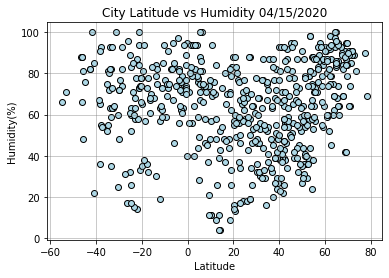

In [41]:
# Create a Scatter Plot for Humidity vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
edgecolor=['black']
colors=['lightblue']
plt.grid(color='grey', linestyle='-',linewidth=0.55,alpha=0.75)
plt.scatter(x_values,y_values,edgecolors=edgecolor, color=colors)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs Humidity 04/15/2020')
plt.savefig("../output_data/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

In [42]:
# Create a Scatter Plot for Clodiness vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
edgecolor=['black']
colors=['lightblue']
plt.grid(color='grey', linestyle='-',linewidth=0.55,alpha=0.75)
plt.scatter(x_values,y_values,edgecolors=edgecolor, color=colors)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs Cloudiness 04/15/2020')
plt.savefig("../output_data/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

In [43]:
# Create a Scatter Plot for Wind Speed vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
edgecolor=['black']
colors=['lightblue']
plt.grid(color='grey', linestyle='-',linewidth=0.55,alpha=0.75)
plt.scatter(x_values,y_values,edgecolors=edgecolor, color=colors)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('City Latitude vs Wind Speed 04/15/2020')
plt.savefig("../output_data/fig4.png")
plt.show()

## Linear Regression

In [44]:
# Create Northern and Southern Hemisphere DataFrames
northerncities=weather_data.loc[weather_data["Lat"]>=0.0]
southerncities=weather_data.loc[weather_data["Lat"]<0.0]
northerncities.reset_index(inplace=True)
southerncities.reset_index(inplace=True)
southerncities.head()

index           City  Cloudiness Country        Date  Humidity    Lat  \
0      1         Vanimo          32      PG  1586969537        79  -2.67   
1      4  Mar del Plata          40      AR  1586969194        55 -38.00   
2      8       Lorengau          99      PG  1586969247        75  -2.02   
3      9   Port Lincoln          45      AU  1586969213        81 -34.73   
4     11      Busselton          34      AU  1586969196        59 -33.65   

      Lng  Max Temp  Wind Speed  
0  141.30     80.19        3.44  
1  -57.56     64.00       16.11  
2  147.27     81.77        2.21  
3  135.87     62.82       14.14  
4  115.33     55.00        5.41

In [45]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearreg(x_val, y_val, x_label, y_label,posn, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    print(f"The r-squared is: {rvalue**2}")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_values,"r-")
    plt.annotate(line_eq,posn,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7684840653623436


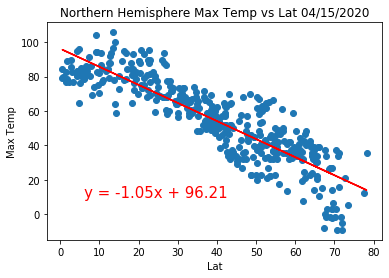

<Figure size 432x288 with 0 Axes>

In [46]:
# Create a Scatter Plot for Max Temp vs latitude for cities in Northern Hemisphere
x_val= northerncities["Lat"]
y_val= northerncities["Max Temp"]
x_label= "Lat"
y_label= "Max Temp"
posn=(6,10)
title="Northern Hemisphere Max Temp vs Lat 04/15/2020"
linearreg(x_val, y_val, x_label, y_label, posn,title)
plt.savefig("../output_data/fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5586569707300805


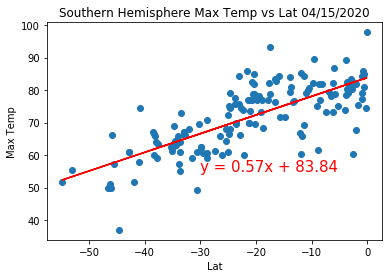

<Figure size 432x288 with 0 Axes>

In [48]:
# Create a Scatter Plot for Max Temp vs latitude for cities in Southern Hemisphere
x_val= southerncities["Lat"]
y_val= southerncities["Max Temp"]
x_label= "Lat"
y_label= "Max Temp"
posn=(-30,55)
title="Southern Hemisphere Max Temp vs Lat 04/15/2020"
linearreg(x_val, y_val, x_label, y_label,posn, title)
plt.savefig("../output_data/fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08460822630773639


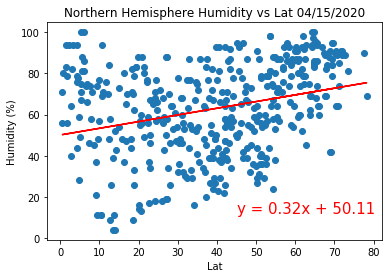

<Figure size 432x288 with 0 Axes>

In [49]:
# Create a Scatter Plot for Humidity vs latitude for cities in Northern Hemisphere
x_val= northerncities["Lat"]
y_val= northerncities["Humidity"]
x_label= "Lat"
y_label= "Humidity (%)"
posn=(45,12)
title="Northern Hemisphere Humidity vs Lat 04/15/2020"
linearreg(x_val, y_val, x_label, y_label,posn, title)
plt.savefig("../output_data/fig7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.003402614785773365


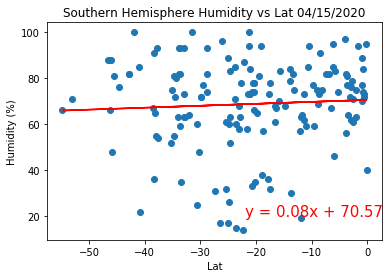

<Figure size 432x288 with 0 Axes>

In [50]:
# Create a Scatter Plot for Humidity vs latitude for cities in Southern Hemisphere
x_val= southerncities["Lat"]
y_val= southerncities["Humidity"]
x_label= "Lat"
y_label= "Humidity (%)"
posn=(-22,20)
title="Southern Hemisphere Humidity vs Lat 04/15/2020"
linearreg(x_val, y_val, x_label, y_label,posn, title)
plt.savefig("../output_data/fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [51]:
# Create a Scatter Plot for Cloudiness vs latitude for cities in Northern Hemisphere
x_val= northerncities["Lat"]
y_val= northerncities["Cloudiness"]
x_label= "Lat"
y_label= "Cloudiness (%)"
posn=(34,30)
title="Northern Hemisphere Cloudiness vs Lat 04/15/2020"
linearreg(x_val, y_val, x_label, y_label,posn, title)
plt.savefig("../output_data/fig9.png")

The r-squared is: 0.04137135333222115


<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.031888484104352306


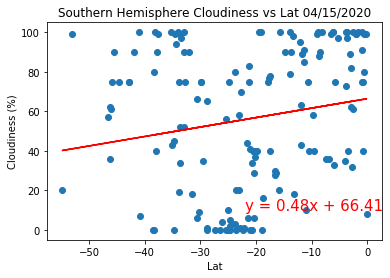

<Figure size 432x288 with 0 Axes>

In [52]:
# Create a Scatter Plot for Cloudiness vs latitude for cities in Southern Hemisphere
x_val= southerncities["Lat"]
y_val= southerncities["Cloudiness"]
x_label= "Lat"
y_label= "Cloudiness (%)"
posn=(-22,10)
title="Southern Hemisphere Cloudiness vs Lat 04/15/2020"
linearreg(x_val, y_val, x_label, y_label,posn, title)
plt.savefig("../output_data/fig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [53]:
# Create a Scatter Plot for Wind Speed vs latitude for cities in Northern Hemisphere
x_val= northerncities["Lat"]
y_val= northerncities["Wind Speed"]
x_label= "Lat"
y_label= "Wind Speed (mph)"
posn=(1,28)
title="Northern Hemisphere Wind Speed vs Lat 04/15/2020"
linearreg(x_val, y_val, x_label, y_label,posn, title)
plt.savefig("../output_data/fig11.png")

The r-squared is: 0.022988031295229593


<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [54]:
# Create a Scatter Plot for Wind Speed vs latitude for cities in Southern Hemisphere
x_val= southerncities["Lat"]
y_val= southerncities["Wind Speed"]
x_label= "Lat"
y_label= "Wind Speed (mph)"
posn=(-22,30)
title="Southern Hemisphere Wind Speed vs Lat 04/15/2020"
linearreg(x_val, y_val, x_label, y_label,posn, title)
plt.savefig("../output_data/fig12.png")

The r-squared is: 0.035389005644668174


<Figure size 432x288 with 0 Axes>